In [206]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
def Counting(filenames, level):
    file_list = sorted(glob.glob(filenames))
    cat1 = [] # >98 samples
    cat2 = [] # >= 90 samples
    cat3 = [] # < 90 samples
    for i in file_list:
        file = open(i)
        #print(i)
        data = [] #the list to categorise the number of samples with AS gene/junction into three groups: > 98; >90; other 
        for line in file:
            nsamples = int(line.split()[0])
            ngenes = int(line.split()[1])
            expression = line.split()[2]
            if nsamples <= 90: data.append(['cat3', ngenes, expression])
            elif nsamples > 98: data.append(['cat1', ngenes, expression])
            else: data.append(['cat2', ngenes, expression])
        df = pd.DataFrame.from_records(data)
        df.columns=['Samples', 'Genes', 'Expression']
        df_explevel = df[df['Expression'] == level] #to filter only records concerning the specific expression level
        explevel = df_explevel.groupby(['Samples'])['Genes'].sum()
        cat1.append(explevel[0])
        cat2.append(explevel[1])
        cat3.append(explevel[2])
    return(np.array(cat1), np.array(cat2), np.array(cat3))

In [208]:
typ = 'genes' #alternative is "junctions"

novaseq_sp_lane = 2076
novaseq_sp_mio = 325000000

novaseq_s4_lane = 4516
novaseq_s4_mio = 2000000000

novaseq_s1_lane = 3516
novaseq_s1_mio = 650000000

seq_depths = np.array([50000000, 100000000, 150000000, 200000000, 250000000, 300000000])
novaseq_sp_samples = novaseq_sp_mio / seq_depths
novaseq_sp_price = novaseq_sp_lane / novaseq_sp_samples
novaseq_sp_price = np.insert(novaseq_sp_price, 0, 0, axis=0)

novaseq_s4_samples = novaseq_s4_mio / seq_depths
novaseq_s4_price = novaseq_s4_lane / novaseq_s4_samples
novaseq_s4_price = np.insert(novaseq_s4_price, 0, 0, axis=0)

novaseq_s1_samples = novaseq_s1_mio / seq_depths
novaseq_s1_price = novaseq_s1_lane / novaseq_s1_samples
novaseq_s1_price = np.insert(novaseq_s1_price, 0, 0, axis=0)


Adipose

In [209]:
level = 'high'
cat1_1, cat2_1, cat3_1 = Counting('./Adipose1_*_x_' + typ + '_in_y_samples', level)
cat1_2, cat2_2, cat3_2 = Counting('./Adipose2_*_x_' + typ + '_in_y_samples', level)
all_high_1 = cat1_1 + cat2_1 + cat3_1
all_high_2 = cat1_2 + cat2_2 + cat3_2
level = 'mid'
cat1_1, cat2_1, cat3_1 = Counting('./Adipose1_*_x_' + typ + '_in_y_samples', level)
cat1_2, cat2_2, cat3_2 = Counting('./Adipose2_*_x_' + typ + '_in_y_samples', level)
all_mid_1 = cat1_1 + cat2_1 + cat3_1
all_mid_2 = cat1_2 + cat2_2 + cat3_2
level = 'low'
cat1_1, cat2_1, cat3_1 = Counting('./Adipose1_*_x_' + typ + '_in_y_samples', level)
cat1_2, cat2_2, cat3_2 = Counting('./Adipose2_*_x_' + typ + '_in_y_samples', level)
all_low_1 = cat1_1 + cat2_1 + cat3_1
all_low_2 = cat1_2 + cat2_2 + cat3_2

In [210]:
all_as_1 = all_high_1 + all_mid_1 + all_low_1
all_as_2 = all_high_2 + all_mid_2 + all_low_2

all_as_1 = np.insert(all_as_1, 0, 0, axis=0)
all_as_2 = np.insert(all_as_2, 0, 0, axis=0)


In [211]:
print(np.diff(all_as_1))
print(np.diff(novaseq_sp_price))

[13314  1457   666   323   132    40]
[319.38461538 319.38461538 319.38461538 319.38461538 319.38461538
 319.38461538]


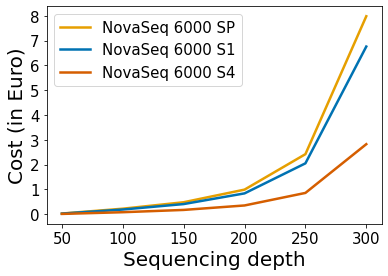

In [212]:
seq_depths = np.array([50, 100, 150, 200, 250, 300])

plt.plot(seq_depths, np.diff(novaseq_sp_price) / np.diff(all_as_1), color='#E69F00', 
         label = 'NovaSeq 6000 SP', linewidth=2.5)
plt.plot(seq_depths, np.diff(novaseq_s1_price) / np.diff(all_as_1), color='#0072B2', 
         label = 'NovaSeq 6000 S1', linewidth=2.5)
plt.plot(seq_depths, np.diff(novaseq_s4_price) / np.diff(all_as_1), color='#D55E00', 
         label = 'NovaSeq 6000 S4', linewidth=2.5)
plt.legend(loc="upper left", fontsize=15)

plt.ylabel('Cost (in Euro)', fontsize=20)
plt.xlabel('Sequencing depth', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

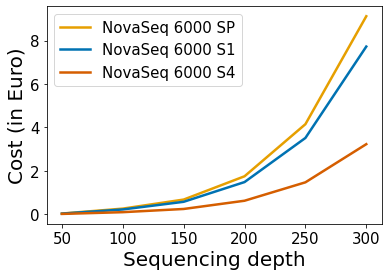

In [213]:
seq_depths = np.array([50, 100, 150, 200, 250, 300])

plt.plot(seq_depths, np.diff(novaseq_sp_price) / np.diff(all_as_2), color='#E69F00', 
         label = 'NovaSeq 6000 SP', linewidth=2.5)
plt.plot(seq_depths, np.diff(novaseq_s1_price) / np.diff(all_as_2), color='#0072B2', 
         label = 'NovaSeq 6000 S1', linewidth=2.5)
plt.plot(seq_depths, np.diff(novaseq_s4_price) / np.diff(all_as_2), color='#D55E00', 
         label = 'NovaSeq 6000 S4', linewidth=2.5)
plt.legend(loc="upper left", fontsize=15)

plt.ylabel('Cost (in Euro)', fontsize=20)
plt.xlabel('Sequencing depth', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

Heart DCM

In [214]:
typ = 'genes'
level = 'high'
cat1_5, cat2_5, cat3_5 = Counting('./J26675_*_x_' + typ + '_in_y_samples', level)
cat1_6, cat2_6, cat3_6 = Counting('./J26676_*_x_' + typ + '_in_y_samples', level)
cat1_7, cat2_7, cat3_7 = Counting('./J26677_*_x_' + typ + '_in_y_samples', level)
cat1_8, cat2_8, cat3_8 = Counting('./J26678_*_x_' + typ + '_in_y_samples', level)
all_high_5 = cat1_5 + cat2_5 + cat3_5
all_high_6 = cat1_6 + cat2_6 + cat3_6
all_high_7 = cat1_7 + cat2_7 + cat3_7
all_high_8 = cat1_8 + cat2_8 + cat3_8
level = 'mid'
cat1_5, cat2_5, cat3_5 = Counting('./J26675_*_x_' + typ + '_in_y_samples', level)
cat1_6, cat2_6, cat3_6 = Counting('./J26676_*_x_' + typ + '_in_y_samples', level)
cat1_7, cat2_7, cat3_7 = Counting('./J26677_*_x_' + typ + '_in_y_samples', level)
cat1_8, cat2_8, cat3_8 = Counting('./J26678_*_x_' + typ + '_in_y_samples', level)
all_mid_5 = cat1_5 + cat2_5 + cat3_5
all_mid_6 = cat1_6 + cat2_6 + cat3_6
all_mid_7 = cat1_7 + cat2_7 + cat3_7
all_mid_8 = cat1_8 + cat2_8 + cat3_8
level = 'low'
cat1_5, cat2_5, cat3_5 = Counting('./J26675_*_x_' + typ + '_in_y_samples', level)
cat1_6, cat2_6, cat3_6 = Counting('./J26676_*_x_' + typ + '_in_y_samples', level)
cat1_7, cat2_7, cat3_7 = Counting('./J26677_*_x_' + typ + '_in_y_samples', level)
cat1_8, cat2_8, cat3_8 = Counting('./J26678_*_x_' + typ + '_in_y_samples', level)
all_low_5 = cat1_5 + cat2_5 + cat3_5
all_low_6 = cat1_6 + cat2_6 + cat3_6
all_low_7 = cat1_7 + cat2_7 + cat3_7
all_low_8 = cat1_8 + cat2_8 + cat3_8

In [ ]:
all_as_5 = all_high_5 + all_mid_5 + all_low_5
all_as_6 = all_high_6 + all_mid_6 + all_low_6
all_as_7 = all_high_7 + all_mid_7 + all_low_7
all_as_8 = all_high_8 + all_mid_8 + all_low_8

all_as_av = (all_as_5 + all_as_6 + all_as_7 + all_as_8)/4

all_as_5 = np.insert(all_as_5, 0, 0, axis=0)
all_as_6 = np.insert(all_as_6, 0, 0, axis=0)
all_as_7 = np.insert(all_as_7, 0, 0, axis=0)
all_as_8 = np.insert(all_as_8, 0, 0, axis=0)

all_as_av = np.insert(all_as_av, 0, 0, axis=0)

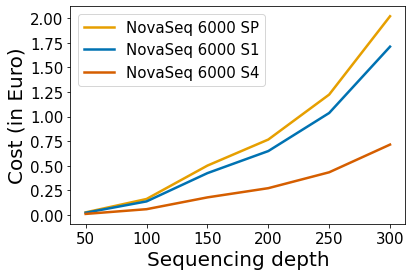

In [205]:
plt.plot(seq_depths, np.diff(novaseq_sp_price) / np.diff(all_as_5), color='#E69F00', 
         label = 'NovaSeq 6000 SP', linewidth=2.5)
plt.plot(seq_depths, np.diff(novaseq_s1_price) / np.diff(all_as_5), color='#0072B2', 
         label = 'NovaSeq 6000 S1', linewidth=2.5)
plt.plot(seq_depths, np.diff(novaseq_s4_price) / np.diff(all_as_5), color='#D55E00', 
         label = 'NovaSeq 6000 S4', linewidth=2.5)
plt.legend(loc="upper left", fontsize=15)

plt.ylabel('Cost (in Euro)', fontsize=20)
plt.xlabel('Sequencing depth', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

Hypothalamus

In [55]:

level = 'high'
cat1_1, cat2_1, cat3_1 = Counting('./Hypothalamus*_x_' + typ + '_in_y_samples', level)
all_high_1 = cat1_1 + cat2_1 + cat3_1
level = 'mid'
cat1_1, cat2_1, cat3_1 = Counting('./Hypothalamus*_x_' + typ + '_in_y_samples', level)
all_mid_1 = cat1_1 + cat2_1 + cat3_1
level = 'low'
cat1_1, cat2_1, cat3_1 = Counting('./Hypothalamus*_x_' + typ + '_in_y_samples', level)
all_low_1 = cat1_1 + cat2_1 + cat3_1


In [56]:
all_as_1 = all_high_1 + all_mid_1 + all_low_1

all_as_1 = np.insert(all_as_1, 0, 0, axis=0)

In [57]:
seq_depths = np.array([50000000, 100000000, 150000000, 200000000])

novaseq_sp_samples = novaseq_sp_mio / seq_depths
novaseq_sp_price = novaseq_sp_lane / novaseq_sp_samples
novaseq_sp_price = np.insert(novaseq_sp_price, 0, 0, axis=0)

novaseq_s4_samples = novaseq_s4_mio / seq_depths
novaseq_s4_price = novaseq_s4_lane / novaseq_s4_samples
novaseq_s4_price = np.insert(novaseq_s4_price, 0, 0, axis=0)

novaseq_s1_samples = novaseq_s1_mio / seq_depths
novaseq_s1_price = novaseq_s1_lane / novaseq_s1_samples
novaseq_s1_price = np.insert(novaseq_s1_price, 0, 0, axis=0)


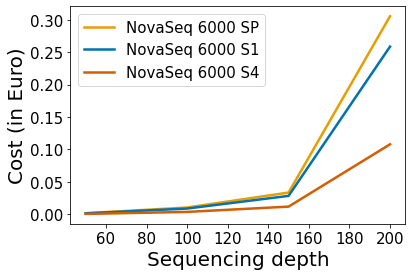

In [58]:
seq_depths = np.array([50, 100, 150, 200])

plt.plot(seq_depths, np.diff(novaseq_sp_price) / np.diff(all_as_1), color='#E69F00', 
         label = 'NovaSeq 6000 SP', linewidth=2.5)
plt.plot(seq_depths, np.diff(novaseq_s1_price) / np.diff(all_as_1), color='#0072B2', 
         label = 'NovaSeq 6000 S1', linewidth=2.5)
plt.plot(seq_depths, np.diff(novaseq_s4_price) / np.diff(all_as_1), color='#D55E00', 
         label = 'NovaSeq 6000 S4', linewidth=2.5)
plt.legend(loc="upper left", fontsize=15)

plt.ylabel('Cost (in Euro)', fontsize=20)
plt.xlabel('Sequencing depth', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()